# IMAGE STACKING USING BINAPPROX ALGORITHM


## Larger Dataset

Running the code on a large number of FITS files illustrates the difference in results between the different
methods of stacking, like mean, median, and binapprox median.

The dataset(1000 FITS) should be sufficient to illustrate all the differences between the three methods of stacking

## BINAPPROX ALGORITHM


0000.fits
0001.fits
0002.fits
0003.fits
0004.fits
0005.fits
0006.fits
0007.fits
0008.fits
0009.fits
0010.fits
0011.fits
0012.fits
0013.fits
0014.fits
0015.fits
0016.fits
0017.fits
0018.fits
0019.fits
0020.fits
0021.fits
0022.fits
0023.fits
0024.fits
0025.fits
0026.fits
0027.fits
0028.fits
0029.fits
0030.fits
0031.fits
0032.fits
0033.fits
0034.fits
0035.fits
0036.fits
0037.fits
0038.fits
0039.fits
0040.fits
0041.fits
0042.fits
0043.fits
0044.fits
0045.fits
0046.fits
0047.fits
0048.fits
0049.fits
0050.fits
0051.fits
0052.fits
0053.fits
0054.fits
0055.fits
0056.fits
0057.fits
0058.fits
0059.fits
0060.fits
0061.fits
0062.fits
0063.fits
0064.fits
0065.fits
0066.fits
0067.fits
0068.fits
0069.fits
0070.fits
0071.fits
0072.fits
0073.fits
0074.fits
0075.fits
0076.fits
0077.fits
0078.fits
0079.fits
0080.fits
0081.fits
0082.fits
0083.fits
0084.fits
0085.fits
0086.fits
0087.fits
0088.fits
0089.fits
0090.fits
0091.fits
0092.fits
0093.fits
0094.fits
0095.fits
0096.fits
0097.fits
0098.fits
0099.fits


0820.fits
0821.fits
0822.fits
0823.fits
0824.fits
0825.fits
0826.fits
0827.fits
0828.fits
0829.fits
0830.fits
0831.fits
0832.fits
0833.fits
0834.fits
0835.fits
0836.fits
0837.fits
0838.fits
0839.fits
0840.fits
0841.fits
0842.fits
0843.fits
0844.fits
0845.fits
0846.fits
0847.fits
0848.fits
0849.fits
0850.fits
0851.fits
0852.fits
0853.fits
0854.fits
0855.fits
0856.fits
0857.fits
0858.fits
0859.fits
0860.fits
0861.fits
0862.fits
0863.fits
0864.fits
0865.fits
0866.fits
0867.fits
0868.fits
0869.fits
0870.fits
0871.fits
0872.fits
0873.fits
0874.fits
0875.fits
0876.fits
0877.fits
0878.fits
0879.fits
0880.fits
0881.fits
0882.fits
0883.fits
0884.fits
0885.fits
0886.fits
0887.fits
0888.fits
0889.fits
0890.fits
0891.fits
0892.fits
0893.fits
0894.fits
0895.fits
0896.fits
0897.fits
0898.fits
0899.fits
0900.fits
0901.fits
0902.fits
0903.fits
0904.fits
0905.fits
0906.fits
0907.fits
0908.fits
0909.fits
0910.fits
0911.fits
0912.fits
0913.fits
0914.fits
0915.fits
0916.fits
0917.fits
0918.fits
0919.fits


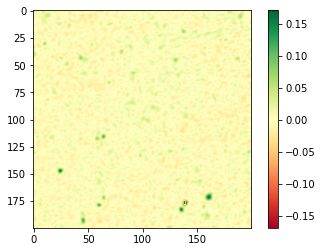

In [4]:
from astropy.io import fits
import numpy as np
import glob

def running_stats(filenames): #calculating mean and standard deviation
  
  n = 0
  for filename in filenames:
    hdulist = fits.open(filename)
    data = hdulist[0].data
    if n == 0:
      mean = np.zeros_like(data)
      s = np.zeros_like(data)

    n += 1
    delta = data - mean
    mean += delta/n
    s += delta*(data - mean)
    hdulist.close()

  s /= n - 1
  np.sqrt(s, s)

  if n < 2:
    return mean, None
  else:
    return mean, s


def get_bin_index(value, minval, bin_width, B):
  for i in range(0, B):
    lrange = (minval + (bin_width * i))
    rrange = (minval + bin_width * (i + 1))
    if lrange <= value < rrange:
      return i
    
def get_median(bin_counter, total, n, minval, bin_width):
  for bin_index, count in enumerate(bin_counter):
    total += count
    if total >= (n + 1) / 2:
      break
  
  lrange = minval + (bin_width * bin_index)
  rrange = minval + (bin_width * (bin_index + 1))
  mid_point = (lrange + rrange) / 2
  return mid_point

def median_bins_fits(filenames, B):
  mean, std = running_stats(filenames)
  minval = mean - std
  maxval = mean + std
  bin_width = (2 * std) / B
  left_bin = np.zeros(mean.shape)
  bins = np.zeros([mean.shape[0], mean.shape[1], B])
  
  for filename in filenames:
    print(filename)
    hdu_list = fits.open(filename)
    hdu_data = hdu_list[0].data
    row, col = hdu_data.shape
    for i in range(row):
      for j in range(col):
        value = hdu_data[i, j]
        if value >= maxval[i, j]:
          continue
        elif value < minval[i, j]:
          left_bin[i, j] += 1
        else:
          bin_index = get_bin_index(value, minval[i,j], bin_width[i,j], B)
          bins[i, j, bin_index] += 1
  
  return mean, std, left_bin, bins


def median_approx_fits(filenames, B): #calculating approximate median using Binapprox algorithm
  mean, std, left_bin, bins = median_bins_fits(filenames, B)
  total = left_bin
  n = len(filenames)
  minval = mean - std
  bin_width = (2 * std) / B
  median = np.zeros(mean.shape)
  
  row, col = mean.shape
  for i in range(row):
    for j in range(col):
      median[i,j] = get_median(bins[i, j, :], total[i, j], n, minval[i, j], bin_width[i, j])
  return median

median = median_approx_fits(glob.glob('*.fits'), 5)
print(median[100,100])

import matplotlib.pyplot as plt
plt.imshow(median, cmap=plt.cm.RdYlGn)
plt.colorbar()
plt.show()

## OBSERVATION

Approx-median of the data = 0.03194517642259598

# CONCLUSION

The algorithm is compact enough to be used in larger datasets. Thus this can be used for 10000 Fits file data base also